In [2]:
import pandas as pd 
import numpy  as np
import mne
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, rfft, fftfreq
from sklearn.preprocessing import StandardScaler as Scaler

### EEG and ECG During Mental Arithmetic Tasks

In [4]:
#high-pass filter
def hpf(x, param = 0.0004):
	y = x.copy()
	
	for n in range(x.shape[0]):
		if(x[n] < param):
			continue
		y.iloc[n] = 2 * y.iloc[n - 1] - y.iloc[n - 2] + x.iloc[n ] - 2 * x.iloc[n - 6] + x.iloc[n - 12] 
	return y

#low-pass filter
def lpf(x, param = 0.0004):
	y = x.copy()
	
	for n in range(x.shape[0]):
		if(x[n] < param):
			continue
		y.iloc[n] = y.iloc[n - 1] - x.iloc[n]/32 + x.iloc[n - 16] - x.iloc[n - 17] + x.iloc[n - 32]/32
	return y

#derrivative of signal
def deriv(x, param = 0.0004):
	y = x.copy()

	for n in range(x.shape[0]):
		if(x[n] < param):
			continue
		y.iloc[n] = (2 * x.iloc[n] + x.iloc[n-1] - x.iloc[n - 3] - 2 * x.iloc[n - 4])/4
	return y

def standard_normalize(x):
	normalizer = Scaler()
	normalizer.fit(x)
	return normalizer.transform(x)

In [5]:
file       = 'eeg-during-mental-arithmetic-tasks-1.0.0/Subject{0}_{1}.edf'
data       = mne.io.read_raw_edf(file.format('00','1'))
raw_data   = np.array(data.get_data())
channels   = np.array(data.ch_names)
data_first = pd.DataFrame(columns=channels, data=raw_data.T)
info       = data.info

Extracting EDF parameters from c:\Users\egorm\OneDrive\Документы\Biotech\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\egorm\\OneDrive\\Документы\\Biotech\\eeg-during-mental-arithmetic-tasks-1.0.0\\Subject00_1.edf'

In [70]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
>

In [71]:
data_first

,EEG Fp1,EEG Fp2,EEG F3,EEG F4,EEG F7,EEG F8,EEG T3,EEG T4,EEG C3,EEG C4,...,EEG T6,EEG P3,EEG P4,EEG O1,EEG O2,EEG Fz,EEG Cz,EEG Pz,EEG A2-A1,ECG ECG
0,4.476049e-06,-2.740303e-06,-2.501739e-06,9.512076e-08,-7.091663e-06,-4.270433e-07,-2.591825e-06,-3.323849e-06,9.994982e-07,8.701120e-07,...,2.807465e-06,-5.239840e-07,1.934084e-06,-3.761434e-06,-1.143977e-06,3.368707e-08,2.716410e-06,8.483060e-07,9.300964e-08,-8.462791e-06
1,1.208021e-06,-3.308754e-06,-4.417835e-06,-5.293539e-07,-8.578160e-06,4.069948e-07,-3.099594e-06,-3.600492e-06,-4.836278e-08,-1.725840e-07,...,3.287228e-06,-1.066739e-06,1.535723e-06,-5.193327e-06,-2.226257e-06,-6.821820e-07,4.828690e-06,4.526143e-07,-2.643236e-07,-8.373018e-06
2,-2.546008e-06,-3.708260e-06,-6.410854e-06,-1.003257e-06,-1.021974e-05,1.877010e-06,-3.695186e-06,-3.867255e-06,-1.132257e-06,-1.328502e-06,...,3.975649e-06,-1.674275e-06,1.128549e-06,-6.556476e-06,-3.095292e-06,-1.284421e-06,6.651260e-06,-1.039277e-07,-4.210487e-07,-8.474013e-06
3,-6.187074e-06,-3.680434e-06,-8.029746e-06,-1.103110e-06,-1.172136e-05,4.015708e-06,-4.265229e-06,-4.053000e-06,-1.984095e-06,-2.360666e-06,...,4.833130e-06,-2.229287e-06,7.936444e-07,-7.478655e-06,-3.420893e-06,-1.540900e-06,7.637135e-06,-7.425033e-07,-2.104102e-07,-9.001428e-06
4,-9.110961e-06,-3.002665e-06,-8.844436e-06,-6.513959e-07,-1.278423e-05,6.717701e-06,-4.670806e-06,-4.096473e-06,-2.337226e-06,-3.025516e-06,...,5.780472e-06,-2.614468e-06,5.874135e-07,-7.642971e-06,-2.982936e-06,-1.248709e-06,7.451202e-06,-1.326390e-06,4.591195e-07,-1.024703e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30995,-4.136072e-10,-1.402458e-09,2.528725e-11,2.310246e-11,-1.487652e-09,-3.033341e-11,-2.836286e-10,-1.815901e-10,-7.982498e-10,-1.178843e-10,...,4.706596e-10,1.263172e-09,-1.314249e-09,1.057554e-09,2.130413e-10,-4.019364e-10,-1.230243e-09,-9.835137e-10,2.283717e-10,9.522179e-09
30996,-4.136072e-10,-1.402458e-09,2.528725e-11,2.310246e-11,-1.487652e-09,-3.033341e-11,-2.836286e-10,-1.815901e-10,-7.982498e-10,-1.178843e-10,...,4.706596e-10,1.263172e-09,-1.314249e-09,1.057554e-09,2.130413e-10,-4.019364e-10,-1.230243e-09,-9.835137e-10,2.283717e-10,9.522179e-09
30997,-4.136072e-10,-1.402458e-09,2.528725e-11,2.310246e-11,-1.487652e-09,-3.033341e-11,-2.836286e-10,-1.815901e-10,-7.982498e-10,-1.178843e-10,...,4.706596e-10,1.263172e-09,-1.314249e-09,1.057554e-09,2.130413e-10,-4.019364e-10,-1.230243e-09,-9.835137e-10,2.283717e-10,9.522179e-09
30998,-4.136072e-10,-1.402458e-09,2.528725e-11,2.310246e-11,-1.487652e-09,-3.033341e-11,-2.836286e-10,-1.815901e-10,-7.982498e-10,-1.178843e-10,...,4.706596e-10,1.263172e-09,-1.314249e-09,1.057554e-09,2.130413e-10,-4.019364e-10,-1.230243e-09,-9.835137e-10,2.283717e-10,9.522179e-09


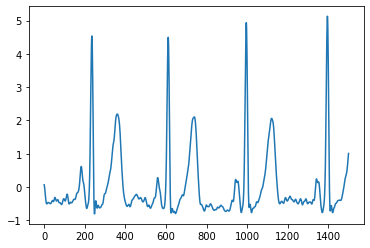

In [267]:
stand_dat = standard_normalize(data_first['ECG ECG'][:1500].to_numpy().reshape(-1, 1))
plt.plot(stand_dat) 
plt.show()
None

In [204]:
yf = fft(data_first['ECG ECG'][:1500].to_numpy())
xf = fftfreq(1500, 1 / 125)

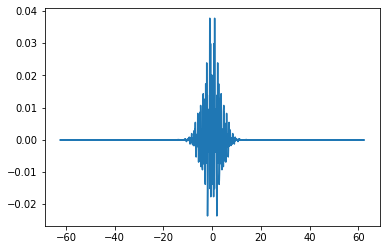

In [205]:
plt.plot(xf, yf)

In [208]:
y = fft(data_first['ECG ECG'][:1500].to_numpy())

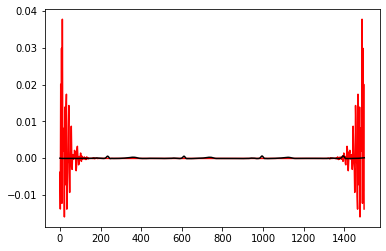

In [209]:
plt.plot(np.arange(0, 1500, 2),[y[i] for i in range(0, y.shape[0], 2)], color = 'red')
#plt.plot(np.arange(1, 500, 2),[y[i] for i in range(1, y.shape[0], 2)], color = 'green')
#plt.plot(y, color = 'blue')
plt.plot(data_first['ECG ECG'][:1500].to_numpy(), color = 'black') 

### The MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database

In [7]:
data          = pd.read_csv('mitbih_train.csv')
data_test     = pd.read_csv('mitbih_test.csv')
data_normal   = pd.read_csv('ptbdb_normal.csv')
data_abnormal = pd.read_csv('ptbdb_abnormal.csv')

In [8]:
data.head(10)

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.985507,0.880435,0.518116,0.213768,0.126812,0.119565,0.083333,0.079710,0.065217,0.068841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data_test.head(10)

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.000000,0.797260,0.320548,0.043836,0.049315,0.065753,0.030137,0.008219,0.005479,0.010959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.909408,0.975610,0.533101,0.134146,0.066202,0.000000,0.010453,0.012195,0.031359,0.146341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.927803,0.866359,0.299539,0.000000,0.231951,0.317972,0.274962,0.262673,0.270353,0.268817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.914230,0.473684,0.000000,0.064327,0.317739,0.405458,0.391813,0.382066,0.401559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.997429,0.861183,0.365039,0.071979,0.082262,0.100257,0.074550,0.051414,0.051414,0.043702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data_normal.head()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB


In [13]:
time_ = data.columns

In [14]:
print(time_)

Index(['9.779411554336547852e-01', '9.264705777168273926e-01',
       '6.813725233078002930e-01', '2.450980395078659058e-01',
       '1.544117629528045654e-01', '1.911764740943908691e-01',
       '1.519607901573181152e-01', '8.578431606292724609e-02',
       '5.882352963089942932e-02', '4.901960864663124084e-02',
       ...
       '0.000000000000000000e+00.79', '0.000000000000000000e+00.80',
       '0.000000000000000000e+00.81', '0.000000000000000000e+00.82',
       '0.000000000000000000e+00.83', '0.000000000000000000e+00.84',
       '0.000000000000000000e+00.85', '0.000000000000000000e+00.86',
       '0.000000000000000000e+00.87', '0.000000000000000000e+00.88'],
      dtype='object', length=188)


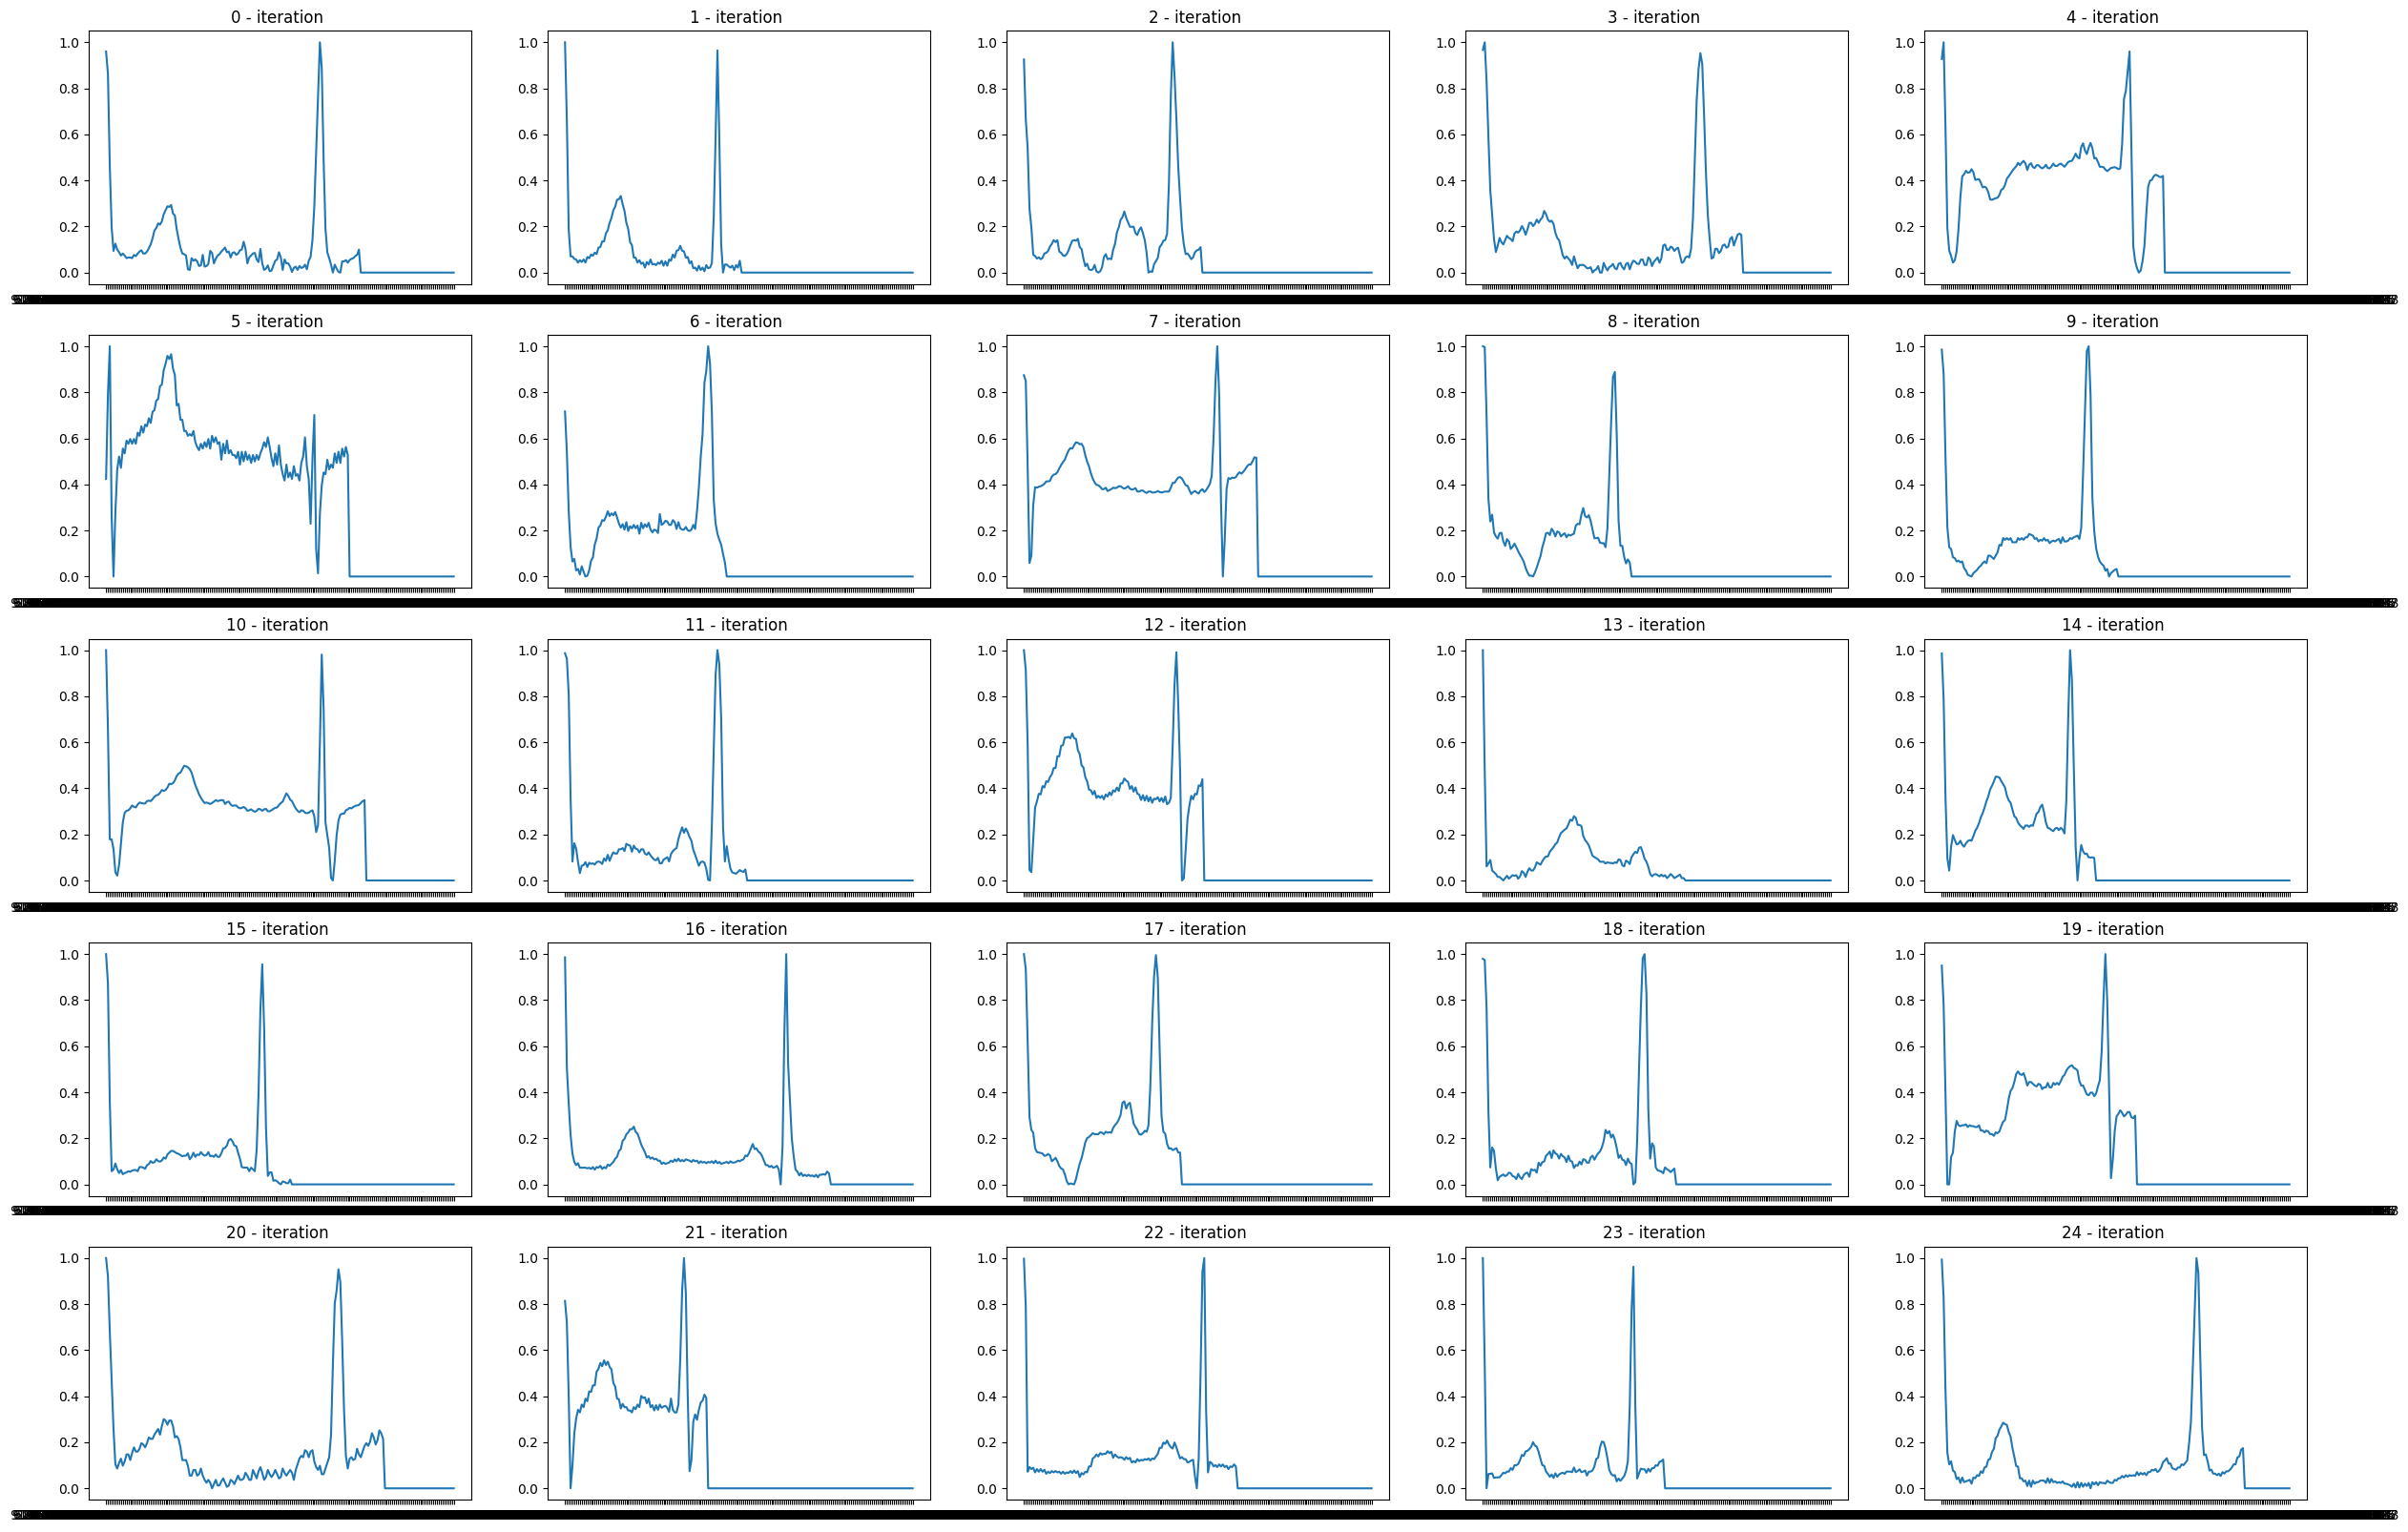

In [15]:
fig, ax = plt.subplots(figsize = (30, 20), nrows = 5, ncols = 5)

for i in range(25):
    ax[i // 5][i % 5].plot(time_, data[i:i+1].to_numpy()[0])
    ax[i // 5][i % 5].set_title(str(i) + ' - iteration ')

plt.show()

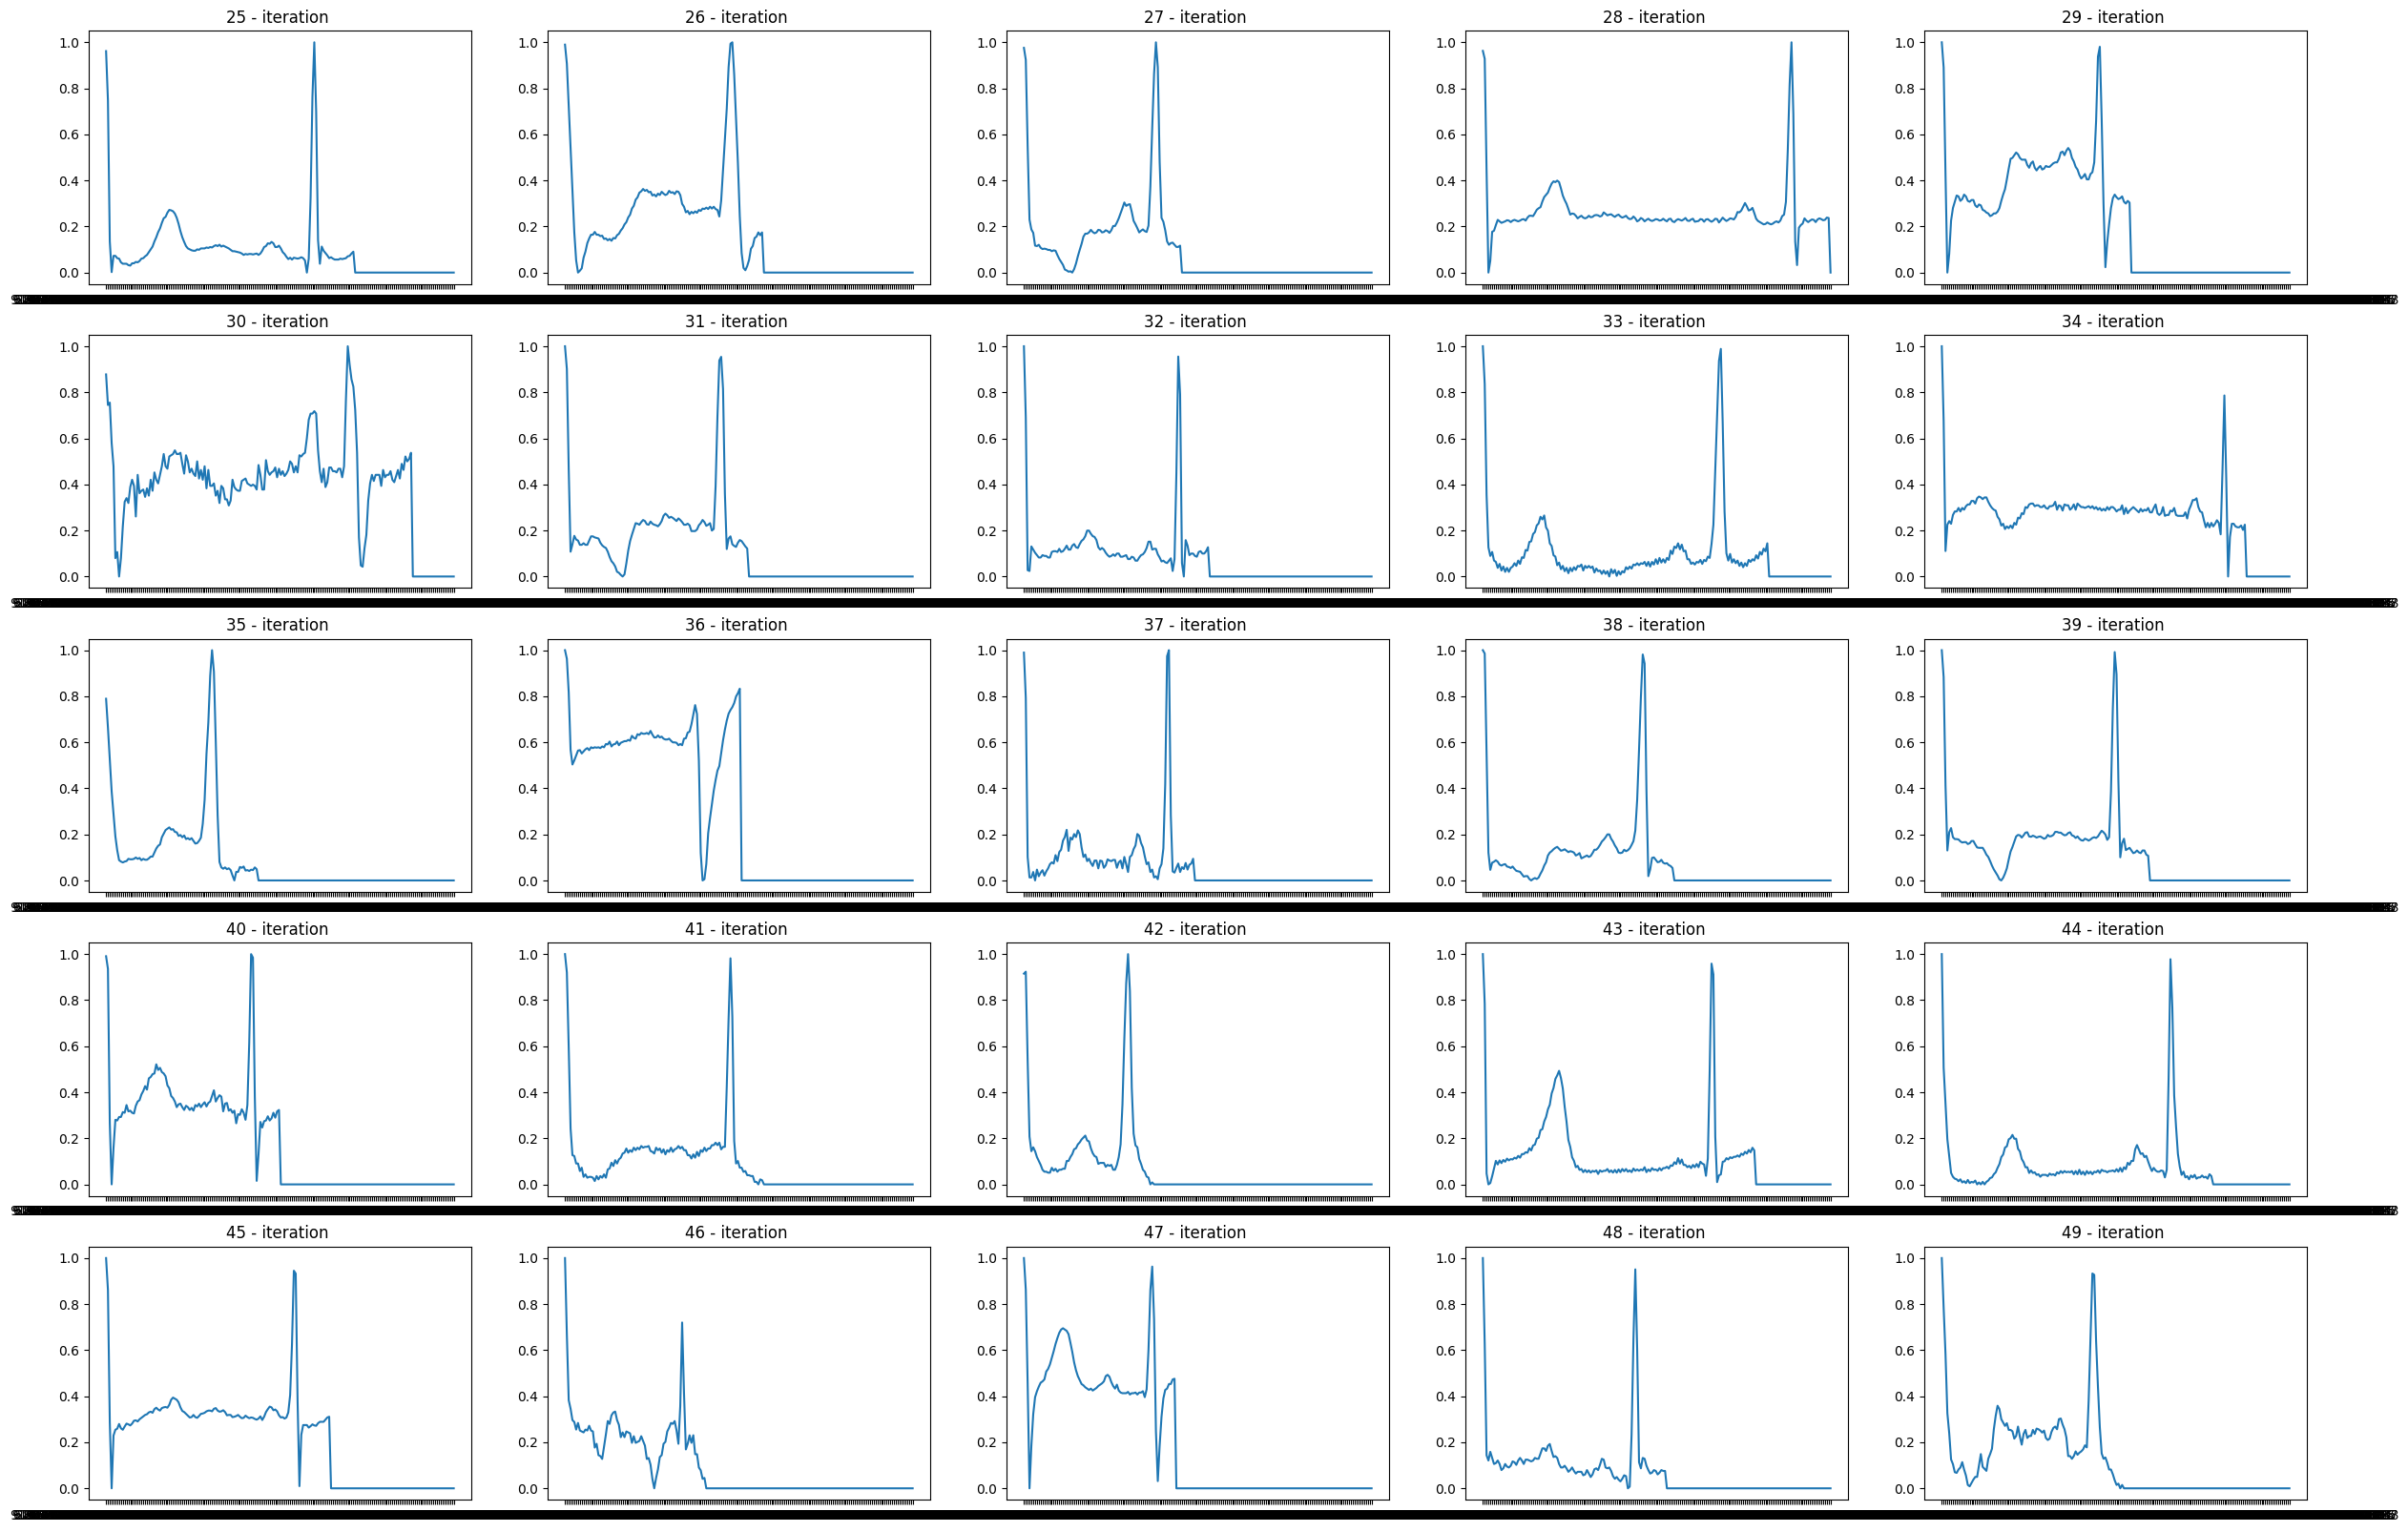

In [16]:
fig, ax = plt.subplots(figsize = (30, 20), nrows = 5, ncols = 5)

for i in range(25, 50):
    ax[(i - 25 )// 5][(i - 25 ) % 5].plot(time_, data[i:i+1].to_numpy()[0])
    ax[(i - 25 ) // 5][(i - 25 ) % 5].set_title(str(i) + ' - iteration ')

In [53]:
times_of_peaks = np.array([])

In [54]:
for i in range(data.shape[0]):
    times_of_peaks = np.append(times_of_peaks, [data[i:i+1].to_numpy()[0][13:].argmax()])

In [55]:
for i in range(data_test.shape[0]):
    times_of_peaks = np.append(times_of_peaks, [data_test[i:i+1].to_numpy()[0][13:].argmax()])

In [56]:
for i in range(data_normal.shape[0]):
    times_of_peaks = np.append(times_of_peaks, [data_normal[i:i+1].to_numpy()[0][13:].argmax()])

In [57]:
for i in range(data_abnormal.shape[0]):
    times_of_peaks = np.append(times_of_peaks, [data_abnormal[i:i+1].to_numpy()[0][13:].argmax()])

In [58]:
times_of_peaks.shape[0] == data.shape[0] + data_test.shape[0] + data_normal.shape[0] + data_abnormal.shape[0]

True

In [59]:
times_of_peaks = times_of_peaks / 125

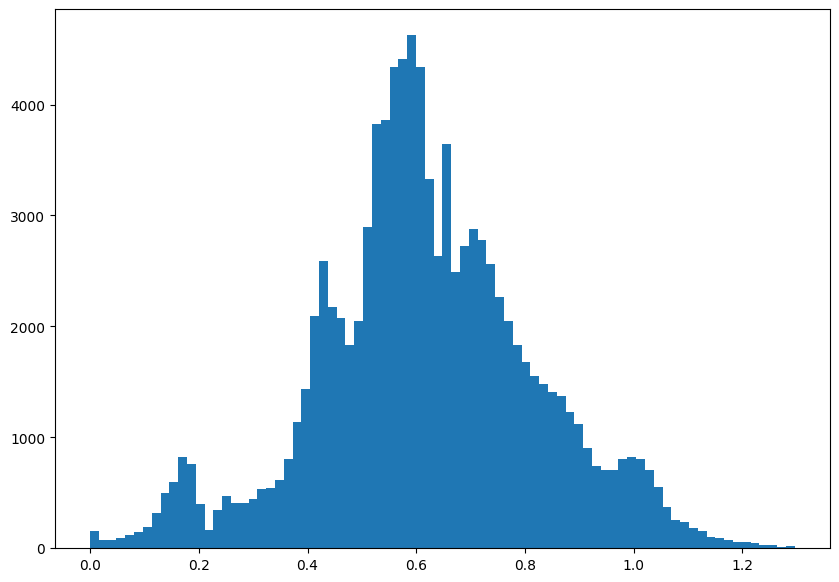

In [62]:
plt.figure(figsize = (10, 7))
plt.hist(times_of_peaks[times_of_peaks < 1.3], bins = 80)
plt.show()

In [97]:
def stat(array):
    average = sum(array)
    N = len(array)
    Dispersion = sum((array[i] ** 2 - average) for i in range(len(array))) / N
    sigma = Dispersion ** 0.5
    return (average, sigma)

In [110]:
NN = times_of_peaks.copy()

array([0.816, 0.552, 0.536, ..., 1.392, 1.392, 0.896])

In [139]:
SDNN = np.zeros(len(NN) // (180 * 5) - 1)
RMSSD = np.zeros(len(NN) // (180 * 5) - 1)
SDSD = np.zeros(len(NN) // (180 * 5) - 1)
for i in range(len(NN) // (180 * 5) - 1):
    #for SDNN
    arr = NN[180 * i: 180 * (i + 5) + 1]
    average = sum(arr) / N
    N = len(arr)
    Dispersion = sum([(arr[i] - average) ** 2 for i in range(len(arr))]) / N
    sigma = Dispersion ** 0.5
    SDNN[i] = sigma
    
    #for RMSSD
    RMSSD[i] = sum([(arr[i] - arr[i + 1]) ** 2 for i in range(N - 1)])

    #for SDSD
    SDSD[i] = (sum([(arr[i] - arr[i + 1]) ** 2 for i in range(N - 1)]) / N) ** 0.5

SDNN for 5 minut intervals

(array([ 4.,  6., 20., 27., 20., 25., 17.,  9.,  5.,  3.]),
 array([0.19493081, 0.19708556, 0.1992403 , 0.20139505, 0.2035498 ,
        0.20570454, 0.20785929, 0.21001403, 0.21216878, 0.21432352,
        0.21647827]),
 <BarContainer object of 10 artists>)

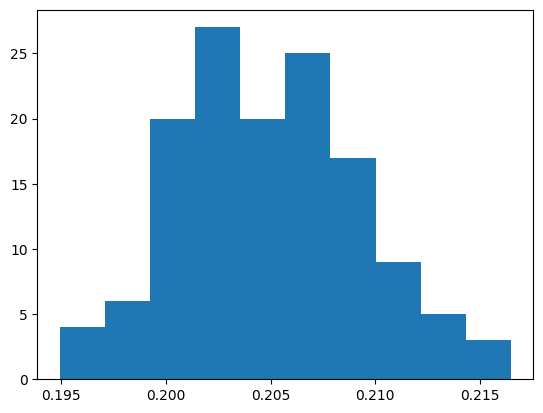

In [140]:
plt.hist(SDNN, bins = 10)

RMSSD for 5 minut intervals

(array([ 4., 12., 16., 25., 21., 25., 10., 16.,  4.,  3.]),
 array([65.6272   , 67.8824192, 70.1376384, 72.3928576, 74.6480768,
        76.903296 , 79.1585152, 81.4137344, 83.6689536, 85.9241728,
        88.179392 ]),
 <BarContainer object of 10 artists>)

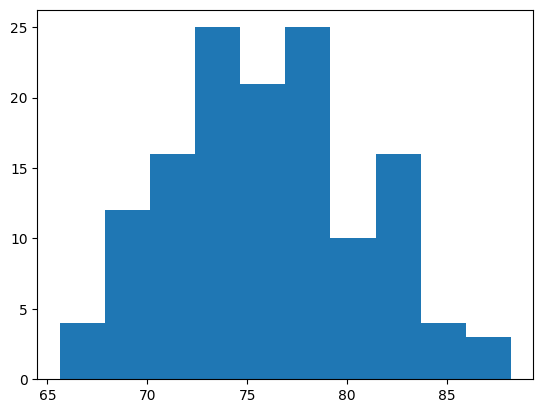

In [141]:
plt.hist(RMSSD, bins = 10) 

SDSD for 5 minut intervals

(array([ 6., 18., 36., 30., 23., 18.,  5.]),
 array([0.26988549, 0.27602174, 0.28215798, 0.28829422, 0.29443046,
        0.30056671, 0.30670295, 0.31283919]),
 <BarContainer object of 7 artists>)

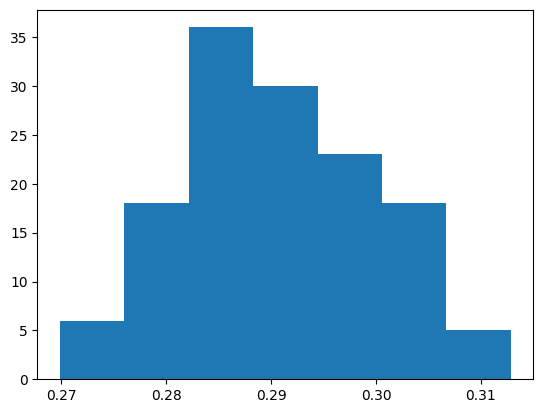

In [143]:
plt.hist(SDSD, bins=7)

NN50

In [163]:
NN50 = abs(NN[1:] - NN[:-1])
NN50 = NN50[NN50 <= 0.05]
print('NN50 quantity: ', len(NN50))
print('NN50 ratio: ', round(len(NN50) / len(NN), 2))

NN50 quantity:  35810
NN50 ratio:  0.29


In [162]:
NN20 = abs(NN[1:] - NN[:-1])
NN20 = NN20[NN20 <= 0.02]
print('NN20 quantity: ', len(NN20))
print('NN20 ratio; ', round(len(NN20) / len(NN), 2))

NN20 quantity:  26647
NN20 ratio;  0.21
